In [19]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')
combine = [train_df, test_df]

In [21]:
#train_df = train_df.dropna()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
train_df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
n_survived = len(train_df[train_df['Survived'] == 1])
not_survived = len(train_df[train_df['Survived'] == 0])
print ("Total number of passengers survived: {}".format(n_survived))
print ("Total number of passengers survived: {}".format(not_survived))

Total number of passengers survived: 342
Total number of passengers survived: 549


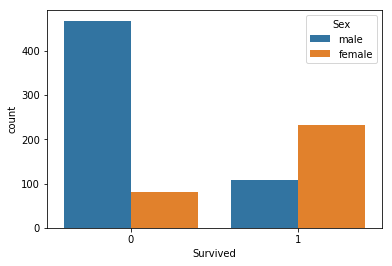

In [25]:
sns.countplot(x='Survived', hue="Sex", data=train_df)

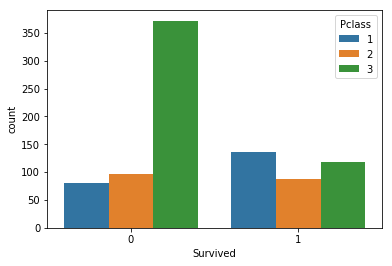

In [26]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)

In [27]:
#sns.countplot(x='Survived', hue='Age', data=train_df)

In [28]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

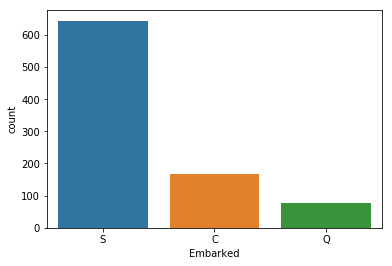

In [29]:
sns.countplot(train_df['Embarked'])

In [30]:
target_df = train_df['Survived']

In [31]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [32]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [33]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 1, 'C': 0,'Q': 2} ).astype(int)

In [34]:
input_train = train_df[['Sex','Pclass','SibSp','Embarked','Fare']]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_train, 
                                                    target_df, test_size=0.20, random_state=42)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print ("Training set has {} samples".format(X_train.shape[0]))
print ("Testing set has {} samples".format(X_test.shape[0]))

(712, 5) (179, 5) (712,) (179,)
Training set has 712 samples
Testing set has 179 samples


In [36]:
## Logistic classification
from sklearn import linear_model
from sklearn.metrics import accuracy_score, fbeta_score

clf_A = linear_model.LogisticRegression()
clf_A.fit(X_train, y_train)
pred = clf_A.predict(X_test)
accuracy = accuracy_score(pred, y_test)
f_score = fbeta_score(y_test, pred, beta=0.5)

print ("Accuracy score of logistic classification: {}".format(accuracy))
print ("f_score of logistic classification: {}".format(f_score))

Accuracy score of logistic classification: 0.7821229050279329
f_score of logistic classification: 0.7428571428571428


In [37]:
## Implementaion & Model tuning of RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer, accuracy_score

clf_r = RandomForestClassifier(random_state = 100)
## Parameters list to fine tune
#parameters = {'criterion': ['gini', 'entropy'], 'n_estimators': [10, 20],
 #            'min_samples_split': [10, 15]}
parameters = {'criterion': ['gini', 'entropy'], 'n_estimators': [50,100,400,700,1000],
             'min_samples_split': [2, 4, 10,12,16], }
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier 
grid_obj = GridSearchCV(clf_r, param_grid=parameters, scoring= scorer)
grid_fit = grid_obj.fit(X_train, y_train)

# best estimator
best_clf_r = grid_fit.best_estimator_
best_predictions = best_clf_r.predict(X_test)

print(grid_fit.best_score_)
print(grid_fit.best_params_) 

##Optimized model
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

0.7659742856604997
{'criterion': 'entropy', 'min_samples_split': 16, 'n_estimators': 400}
Final accuracy score on the testing data: 0.8045
Final F-score on the testing data: 0.7784


In [38]:
test_df_one_hot_encoded = pd.get_dummies(input_train)

In [46]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [48]:
test_df.drop(['PassengerId']).head(2)#,'Cabin','Ticket','Parch'

KeyError: "labels ['PassengerId'] not contained in axis"

In [42]:
input_train.head()

,Sex,Pclass,SibSp,Embarked,Fare
0,0,3,1,1,7.2500
1,1,1,1,0,71.2833
2,1,3,0,1,7.9250
3,1,1,1,1,53.1000
4,0,3,0,1,8.0500


In [39]:
test_pred = best_clf_r.predict(test_df_one_hot_encoded)

submission = pd.DataFrame({
           "PassengerId": test_df["PassengerId"],
           "Survived": test_pred
           })

submission.to_csv('submission.csv', index=False)

ValueError: array length 891 does not match index length 418